<a href="https://colab.research.google.com/github/bebeam2942/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import os
from datetime import date,datetime,time
import io

In [4]:
data = pd.read_csv('/content/drive/MyDrive/dataviz_2021_data/search_request.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


## เตรียมข้อมูล

#### แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [5]:
data['search_timestamp']= pd.to_datetime(data['search_timestamp'],dayfirst=True,errors ='coerce')
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


## Bar char (กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ wed Wongnai.com เพื่อค้นหาร้านอาหารในแต่ละวัน

In [6]:
from matplotlib import pyplot as plt

In [7]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [8]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'กราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ในแต่ละวัน')

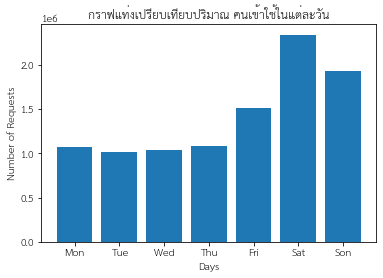

In [9]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 1].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 2].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 3].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 4].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 5].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                      ], tick_label = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']);
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('กราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ในแต่ละวัน')

Grouped bar chart

แสดงปริมาณคนเข้าเว็บในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11.00-12.00 กับ 23.00-24.00

In [10]:
data[data['search_timestamp'].dt.dayofweek == 0
     & (data['search_timestamp'].dt.time < time(hour=12)) 
     & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0] #

1076297

In [26]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [27]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [25]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [14]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

In [19]:
import numpy as np

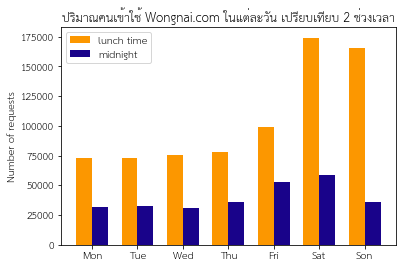

In [33]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,b4lunch, width, label='lunch time',color = '#fc9700')  #input ตัวแรกคือตำแหน่งในแนวแกนx(ตามด้วยx-width/2 คือกำหนดความกว้าง)
rects2 = ax.bar(x + width/2,b4midnight, width, label='midnight',color = '#19038a') #ตามด้วยอีกกราฟที่ต้องการเปรียบเทียบ

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

### Stacked bar chart

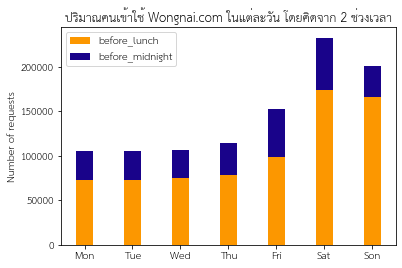

In [39]:
#ถ้ารวมปริมาณการสั่งอาหารระหว่างช่วงเวลา กับ ช่วงวัน อันไหนมากกว่ากัน
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels,b4lunch, width,label='before_lunch',color = '#fc9700')
ax.bar(labels,b4midnight, width,bottom=b4lunch,   #bottomคือการบอกว่าเริ่มจากตรงไหน
       label='before_midnight',color = '#19038a')

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

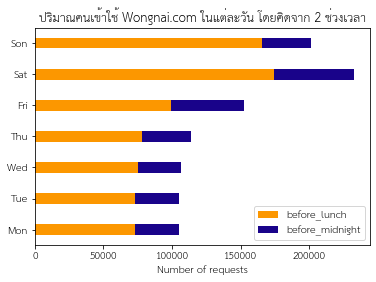

In [40]:

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,b4lunch, width,label='before_lunch',color = '#fc9700')
ax.barh(labels,b4midnight, width,left=b4lunch,   #bottomคือการบอกว่าเริ่มจากตรงไหน
       label='before_midnight',color = '#19038a')

ax.set_xlabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
# เช็คชื่อ โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน wongnai.com 2ช่วงเวลา โดยให้กราฟแสดงสัดส่วนของคนใช้งานในแต่ละวันด้วย


In [46]:
labels2 = ['b4lunch','b4midnigh']

In [48]:
time = ['b4lunch','b4midnigh']

 
plt.bar(ind, golds, width=0.6, label='Mon', color='yellow', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.6, label='Tue', color='pink', bottom=bronzes)
plt.bar(ind, bronzes, width=0.6, label='Wed', color='green')
plt.bar(ind, bronzes, width=0.6, label='Thu', color='orange')
plt.bar(ind, bronzes, width=0.6, label='Fri', color='purple',bottom=red+blue)
plt.bar(ind, bronzes, width=0.6, label='Sat', color='blue',bottom=red)
plt.bar(ind, bronzes, width=0.6, label='Son', color='red')
 
plt.xticks(ind, countries)
plt.ylabel("'Number of requests")
plt.xlabel("'time")
plt.legend(loc="upper right")
plt.title("'ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา")
plt.show()

NameError: ignored